# COM2004/3004 Assignment 2023-2024




## Developing a Chessboard Diagram classifier

**Due**: 11.59 pm on Tuesday 12th December

**Contents**

<!-- TOC depthFrom:1 orderedList:false -->

- [COM2004/3004 Assignment](#com20043004-assignment)
  - [1. Objective](#1-objective)
  - [2. Background](#2-background)
  - [3. What you are given](#3-what-you-are-given)
  - [4. How to proceed](#4-how-to-proceed)
  - [5. Additional rules](#5-additional-rules)
  - [6. Submission](#6-submission)
  - [7. How your work will be assessed](#7-how-your-work-will-be-assessed)
  - [8. Lateness penalty](#8-lateness-penalty)

<!-- /TOC -->

## 1. Objective

You will build and evaluate a system that can take a printed chessboard diagram and report which piece is on each square. The input to the system is a set of images in `jpeg` format. The output is a sequence of labels representing the pieces, e.g. 'k' = King, 'q' = Queen, etc. You are given labelled data sets for training and evaluation, and some template code to help you get started.

## 2. Background

In the lab classes, you have been experimenting with techniques for classification and dimensionality reduction. In this assignment, you will use the experience you have gained to build a system for transforming diagrams of chessboards (taken from books) and converting them into a representation of the chessboard state. This involves taking the diagram of the full board, cutting it into 64 separate squares and then working out what is on each square. The squares can either be empty or they can contain a piece. A piece is either a white or a black pawn, bishop, knight, rook, king or queen.

The images you will be processing have come from a classic book on chess published in the early 20th century,

- Chess Fundamentals, José Raúl Capablanca (1921)

The task is not as straightforward as you might imagine because the mechanical printing process, used at the time of publication, produces images that have a lot variability (see the Figure 1). Note that there are a lot of imperfections. However, you are provided with a hand-labeled set of training data and if you use appropriate techniques you should be able to build a very robust classifier.

Example chessboard image.

<img alt="A diagram of a chessboard" src="data/clean/capablanca/078.jpg" width=280px />

The same with added noise.

<img alt="Diagram with added noise" src="data/noisy/capablanca/078.jpg" width=280px />


To make the task more challenging:

  1. You are also given a dataset in which the images have been corrupted, i.e., by the addition of artificial noise.
  2. Your classification system can use no more than 10 features to represent each square.

Two versions of the classifier are required.

  1. *Independent Square classification*.  In this version, the classifier has to make a decision for each square using only the image of that square and no other information, i.e., the system does not know the position of the square within the board, or the appearance of other squares on the board.
  2. *Full-board classification*. In this version, the system has access to additional context: it knows the location of the square within the board and the appearance of all 64 squares that make up the board.

The second version is more challenging. It will be possible to get a good mark on the assignment even if little progress is made on this component.

## 3. What you are given

You have been given,

1. data for training and testing your systems, and
2. some template code to get you started.

The template code will run but it will produce poor results. The dimensionality reduction and classification stages have been given stub implementations: they return the correct type of value but do nothing useful. You will need to replace these implementations using ideas that you have learnt during the course.

### 3.1. The data

There are two types of data.

1. *Image files*. These are `jpg` images of chessboard diagrams. The images have all be pre-processed to be exactly 400 by 400 pixels, i.e., each square is 50 by 50 pixels.
2. *Label files*. There are two label files: `boards.train.json` which provides labels for the training data, and `boards.dev.json` which provides labels for the test data. They are stored in JSON format and contain a list of dictionaries. Each dictionary represents one board and has the structure shown below,

```json
 {
    "image": "capablanca/078.jpg",
    "fen": "2R5/p4p1k/5p1p/6r1/5K2/4P2P/Pr4P1/7R",
    "board": [
      "..R.....",
      "p....p.k",
      ".....p.p",
      "......r.",
      ".....K..",
      "....P..P",
      "Pr....P.",
      ".......R"
    ]
  },
```

In the dictionary, the fields have the following meaning:

- `image` field is the name of the board image.
- `fen` is a representation of the board in FEN notation. This field is not used.
- `board` is a string representation of the board.

The string representation is interpreted as follows. A list of 8 strings provides the state of each board row. Each string is a sequence of 8 characters, one per each square in the row. The `.` represents an empty square. Uppercase letters represent white pieces, and lowercase letters are black pieces. The letters have the following meaning: k = king, q = queen, r = rook, n = knight, b = bishop and p = pawn.

### 3.2. The code

The code is organised into four Python files: `train.py`, `evaluate.py`, `utils.py` and `system.py`. `train.py` and `evaluate.py` will train and test the system, respectively. They will do this by using code in  `system.py`. Your task is to rewrite the code in `system.py` to produce a working system. **No other Python file should be changed.**

In brief, the code files have the following function.

- `train.py` - this runs the training stage. It will train two models: one using the clean data and one using the noisy data. For each model, `train.py` will read the corresponding training data, process it, and store results. Results are saved in a pair of files called `model.clean.json.gz` and `model.noisy.json.gz` stored in the directory, `data/`. The training code uses functions in `system.py` that you will need to modify and extend. Do not change the code in the `train.py` file.

- `evaluate.py` - this runs the evaluation stage. It will run two evaluations: one using clean data and one using noisy data. For each dataset, `evaluate.py` first reads the corresponding model file, i.e., `model.clean.json.gz` or `model.noisy.json.gz`. It will then perform the classification on the test set. Finally, it will use the test set labels to evaluate the classifier and provide a score. It will run the evaluation in two modes: `isolated square mode` and `full board mode`. It will print out the overall percentage of squares classified correctly for each mode. Again, it uses functions in `system.py` that you will need to modify and extend. Do not change the code in the `evaluate.py` file.

- `utils.py` - these are simple utility functions that read the chessboard images and read/write data to the model files. Do not change the code in this file.

- `system.py` - the code in this file is used by both `train.py` and `evaluate.py`. It implements the key system functionality, including the dimensionality reduction and classification steps that you will develop. The provided version contains dummy code that will run but which won't produce good results. The dummy dimensionality reduction just returns a vector of 0's. The dummy classifier outputs the label for 'empty square' regardless of the input.

Your task is to write a new version of `system.py`. Your solution must not change `train.py`, `evaluate.py` or `utils.py`. Once finished, you will run `train.py` to generate your own versions of `model.clean.json.gz` and `model.noisy.json.gz`. You will then submit the `system.py` along with the `model.clean.json.gz` and `model.noisy.json.gz` files. The assignment assessors will then run the program `evaluate.py` using your copy of `system.py` and your model files. We will evaluate using a new set of test board images that you have not seen during development. The performance on these unseen test boards will form part of the assessment of your work.

## 4. How to proceed

The plan below has been written to help you get started. Steps 1 and 2 should be completed first. Steps 3 to 6 are not necessarily sequential, and you are free to use any process you wish. However, it is recommended that you read through this section carefully before considering how best to proceed.

### Step 1: Read and understand the code provided

The code provided does all the file handling and some of the initial processing steps for you, e.g., segmenting the board into squares. Spend time to understand how it works before planning your solution.

### Step 2: Test the code provided

Check that you can run the code provided. You can download it to your machine and run it in your local environment, or you can run it directly using Jupyter as explained at the end.

```cd com2004_labs/chess_assignment/code```

Run the train step

```python train.py```

Then run the evaluation step

```python evaluate.py```

The code should print out the percentage of correctly classified board squares for the various test conditions. The dummy code will produce a result of 63.8\% for all conditions.

### Step 3: Working on the training stage

The function `process_training_data` in `system.py` processes the training data and returns results in a dictionary called `model_data`. The program `train.py` calls `process_training_data` and saves the resulting `model_data` dictionary to the files `model.clean.json.gz` and `model.noisy.json.gz`. These files are then used by the classifier when `evaluate.py` is called. So, any data that your classifier needs must go into this dictionary. For example, if you are using a nearest neighbour classifier then the dictionary must contain the feature vectors and labels for the complete training set. If you are using a parametric classifier then the dictionary must contain the classifier's parameters. The function is currently written with a nearest neighbour classifier in mind. Read it carefully and understand how to adapt it for your chosen approach.

### Step 4: Implementing dimensionality reduction

You are free to use any dimensionality reduction technique. PCA should perform well but is not necessarily the best approach. Start by looking at the function `reduce_dimensions` in the existing `system.py` code provided. This function currently just returns the first 10 pixels of each image and will not work well. It will need to be rewritten.

### Step 5: Implementing the classifier

You are free to use any classification technique. A nearest neighbor classifier should work well but is not necessarily the best approach. Start by looking at the functions `classify_squares` and `classify` in the `system.py` code provided. These functions currently just returning the empty square label ('.') regardless of the input. They will need to be rewritten.

### Step 6: Full board classifier

If you get the basic classifier working well then you can consider the full board classification mode. This requires you to implement the function `classify_boards` that appears in `system.py`. `classify_boards` is passed the squares in the same order as they appear in the board. This means that you can work out the position of the square within the board, and you can see the contents of other squares on the same board. You can potentially use this information to improve the classification performance. Currently, the `classify_boards` function simply calls the simpler `classify_squares` function, so it will not produce a better result. Improving upon the `classify_squares` result might be quite difficult but credit will be given for any good ideas even if they do not work well.

## 5. Additional rules

Some additional important rules must be obeyed. **Read these carefully**.

- The file `model.clean.tar.gz` and `model.noisy.tar.gz` must each be no bigger than 3 MB
- The `evaluate.py` program should not take more than 120 seconds to produce a result when it runs on the CoCalc servers.
- You may make use of any code from the lab classes, even code appearing in the solutions (but you may want to improve it!)
- Python modules: You may only import `numpy`, `scipy`, or modules in the Python standard library. For a list of modules in the standard library see [http://docs.Python.org/3/library/](http://docs.Python.org/3/library/). If in doubt, please ask.
- 3rd party source code: With the exception of code from the labs, you should not be using source code from 3rd parties. If you do use code that is not your own **you must** provide **clear** attribution, i.e., place it in a separate function with a comment that provides the URL of the original code. Failure to do so may be considered a case of Unfair Means.

## 6. Submission

Submission will be via Blackboard. You must submit the following.

- A copy of your `system.py`
- A copy of your data file, `model.clean.json.gz`
- A copy of your data file, `model.noisy.json.gz`
- A form (which will appear on Blackboard) in which you will:
  - report the performance of your system on the development set;
  - explain/justify the design of your feature selection;
  - explain/justify the design of the square classifier;
  - explain/justify the design of any extra steps performed for full-board classification.

**Deadline: 11:59 pm on Tuesday, December 12th.**

## 7. How your work will be assessed

**The assignment is worth 50% of the module mark.**

We will be looking at the Python code quality, the overall design and the performance of your program. Assessors will be looking at your reports, so make sure to describe your work clearly. You will be awarded a mark out of 50 made up from the following five 10-mark components.


### Feature extraction (10 Marks)

*Assessed via the written report and evidence of implementation in the code.*

- Have you employed an appropriate feature extraction technique?
- Have you justified the choice and design of the feature extraction stage?
- Have you implemented the chosen technique well?

### Square Classification (10 Marks)

*Assessed via the written report and evidence of implementation in the code.*

- Have you employed an appropriate classification technique?
- Have you justified the choice and design of the classifier?
- Have you implemented the chosen technique well?

### Full-board Classification (10 Marks)

*Assessed via the written report and evidence of implementation in the code.*

- Have you justified any additional steps taken?
- Have you implemented the additional steps well?
- Does the full-board approach perform better than the simpler isolated square classifier?

### Code quality (10 Marks)

*Assessed via examination of the code.*

- Is the implementation clear? (i.e., concise and simple, compared to verbose and unnecessarily complicated)
- Is there good documentation within the code? (i.e., consistent documentation of functions and comments added where they are required.)
- Does it make appropriate use of Python's features?

### Overall performance (10 Marks)

*Assessed by running the code.*

- Does the code run correctly?
- How does the performance compare to that achieved using a standard nearest neighbour and PCA approach?
- How does the performance compare to the performances of other students?

For guidance, the table below shows the approximate performance that you should expect using a basic nearest neighbour and PCA-based approach. These figure were obtained using isolated square classification (i.e., each square being classified independently with no use of the surrounding context.)

Dataset | Score
--- | ---
Clean | 97.5%
Noisy | 90.9%
## 8. Lateness penalty

There will be a standard 5% penalty for each working day late.

**WARNING: This is an individual assignment. Do not share your code with other students. Collusion will result in a loss of marks for all students involved. Uncredited code taken from Github or other sources will be treated as plagiarism. Anything looking suspicious will be investigated. Start early and if you are stuck ask for help.**

_(COM2004/3004 2023-24 Assignment Handout v1.0)_


## Running the code in a notebook

If you would rather run your code using the Jupyter notebooks that we have been using in the labs you can run them as below. This will import the modules and then run them using their internal `main()` functions. You will still need to edit the `system.py` file which will be loaded by the train and evaluate files. **If you edit the `system.py` file you will need to reload your kernel** to make sure that the new code has been loaded by your Jupyter notebook. You will still need to submit the `.py` files as stated earlier.

Training model with clean data
Length
6400


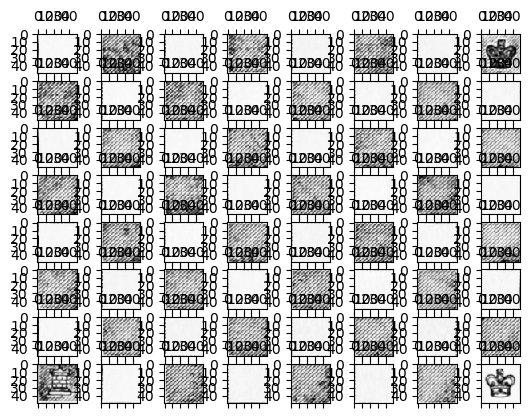

Training model with noisy data
Length
6400


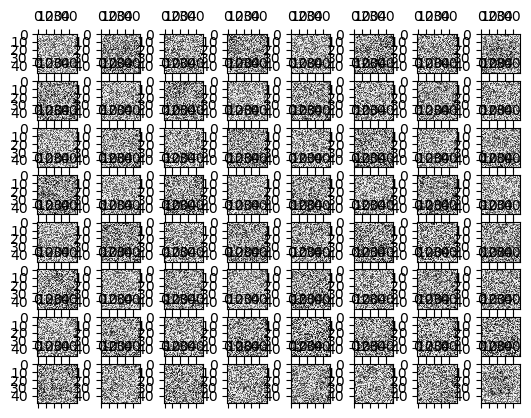

In [1]:
import train

train.main()

Running evaluation with the clean data.
Length
1600


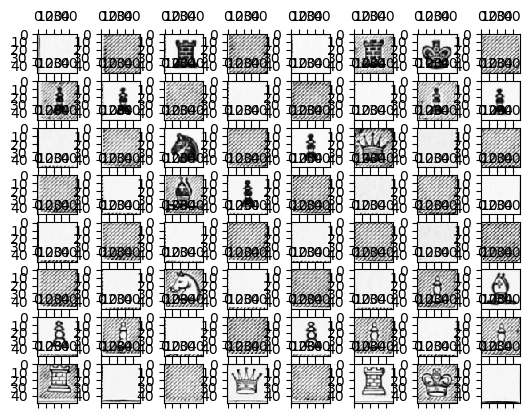

Square mode: score = 97.4% correct
Board mode: score = 97.4% correct
Running evaluation with the noisy data.
Length
1600


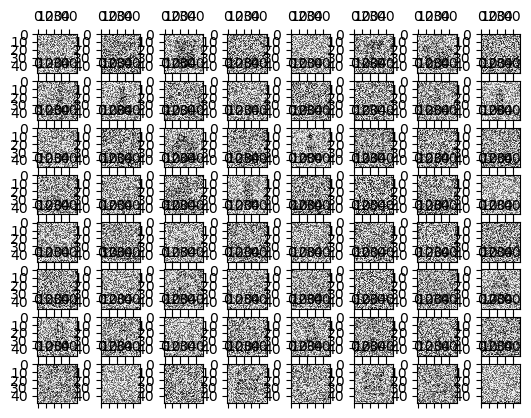

Square mode: score = 89.9% correct
Board mode: score = 89.9% correct


In [1]:
import evaluate

evaluate.main()